In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame as pdf
import numpy as np

In [3]:
# train = pd.read_csv('../datasets/.csv')
label_and_features = np.genfromtxt('../datasets/fiveClass.csv', delimiter=',')
# 76 cols. 75 features  + label col at 0, and 3 SP columns at end.
label_and_features.shape


(9401, 76)

In [5]:
cols_to_remove  = list(range(21, 61)) + [70, 73, 74, 75]
print(len(cols_to_remove))
label_and_features_less = np.delete(label_and_features, cols_to_remove, axis=1)
label_and_features_less.shape

44


(9401, 32)

In [15]:
cols = ['class', 'A%', 'C%', 'D%', 'E%', 'F%', 'G%', 'H%', 'I%', 'K%', 'L%', 'M%', 'N%', 'P%', 'Q%', 'R%',
        'S%', 'T%', 'V%', 'W%', 'Y%', 'Nt50_hb', 'Ct50_hb', 'mw', 'flx', 'ar', 'ip', 'nc', 'mnc',
        'tc', 'hb', 'protein length']
print(len(cols))

32


In [16]:
laf = pd.DataFrame(label_and_features_less, columns=cols)
laf

,class,A%,C%,D%,E%,F%,G%,H%,I%,K%,...,Ct50_hb,mw,flx,ar,ip,nc,mnc,tc,hb,protein length
0,0.0,98.0,10.0,52.0,54.0,18.0,94.0,33.0,18.0,46.0,...,-103.0,94.0,1008.0,35.0,773.0,108.0,12.0,189.0,-45.0,885.0
1,0.0,53.0,24.0,87.0,64.0,59.0,46.0,18.0,61.0,68.0,...,-89.0,62.0,1001.0,107.0,478.0,-2874.0,-529.0,136.0,-29.0,543.0
2,0.0,62.0,10.0,62.0,67.0,44.0,56.0,36.0,41.0,54.0,...,-56.0,44.0,1001.0,77.0,607.0,-734.0,-188.0,93.0,-39.0,390.0
3,0.0,80.0,19.0,54.0,67.0,22.0,71.0,35.0,51.0,45.0,...,-15.0,34.0,1001.0,54.0,504.0,-1648.0,-528.0,60.0,-23.0,312.0
4,0.0,60.0,17.0,66.0,58.0,62.0,55.0,21.0,55.0,70.0,...,29.0,53.0,998.0,109.0,557.0,-1062.0,-226.0,106.0,-6.0,469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9396,4.0,68.0,16.0,36.0,32.0,20.0,80.0,44.0,20.0,28.0,...,-104.0,28.0,1005.0,40.0,1194.0,3258.0,1308.0,67.0,-104.0,249.0
9397,4.0,161.0,8.0,84.0,56.0,4.0,68.0,8.0,36.0,4.0,...,68.0,26.0,1001.0,16.0,445.0,-1567.0,-629.0,55.0,5.0,249.0
9398,4.0,221.0,8.0,60.0,52.0,12.0,56.0,36.0,24.0,4.0,...,-37.0,27.0,992.0,56.0,676.0,-142.0,-57.0,55.0,-3.0,249.0
9399,4.0,104.0,8.0,60.0,68.0,32.0,84.0,12.0,52.0,4.0,...,-41.0,27.0,997.0,64.0,553.0,-464.0,-186.0,60.0,-11.0,249.0


In [25]:
replacements = {0: 'cyto', 1: 'secreted', 2: 'mito', 3: 'nuclear', 4: 'other'}
laf['class'].replace(replacements, inplace=True)

In [27]:
laf[3333:]

,class,A%,C%,D%,E%,F%,G%,H%,I%,K%,...,Ct50_hb,mw,flx,ar,ip,nc,mnc,tc,hb,protein length
3333,secreted,59.0,15.0,68.0,73.0,31.0,62.0,53.0,53.0,53.0,...,-16.0,52.0,1001.0,75.0,599.0,-1305.0,-287.0,115.0,-49.0,455.0
3334,secreted,43.0,10.0,72.0,68.0,34.0,92.0,39.0,29.0,53.0,...,-152.0,23.0,1007.0,77.0,561.0,-749.0,-362.0,51.0,-75.0,207.0
3335,secreted,91.0,16.0,69.0,44.0,38.0,66.0,31.0,44.0,78.0,...,-73.0,36.0,1001.0,122.0,765.0,44.0,14.0,73.0,-54.0,320.0
3336,secreted,66.0,16.0,36.0,66.0,41.0,54.0,22.0,52.0,64.0,...,-52.0,167.0,1000.0,91.0,646.0,-935.0,-62.0,297.0,-18.0,1500.0
3337,secreted,173.0,0.0,19.0,19.0,58.0,38.0,0.0,38.0,77.0,...,0.0,5.0,997.0,58.0,1045.0,328.0,631.0,8.0,56.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9396,other,68.0,16.0,36.0,32.0,20.0,80.0,44.0,20.0,28.0,...,-104.0,28.0,1005.0,40.0,1194.0,3258.0,1308.0,67.0,-104.0,249.0
9397,other,161.0,8.0,84.0,56.0,4.0,68.0,8.0,36.0,4.0,...,68.0,26.0,1001.0,16.0,445.0,-1567.0,-629.0,55.0,5.0,249.0
9398,other,221.0,8.0,60.0,52.0,12.0,56.0,36.0,24.0,4.0,...,-37.0,27.0,992.0,56.0,676.0,-142.0,-57.0,55.0,-3.0,249.0
9399,other,104.0,8.0,60.0,68.0,32.0,84.0,12.0,52.0,4.0,...,-41.0,27.0,997.0,64.0,553.0,-464.0,-186.0,60.0,-11.0,249.0


/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of

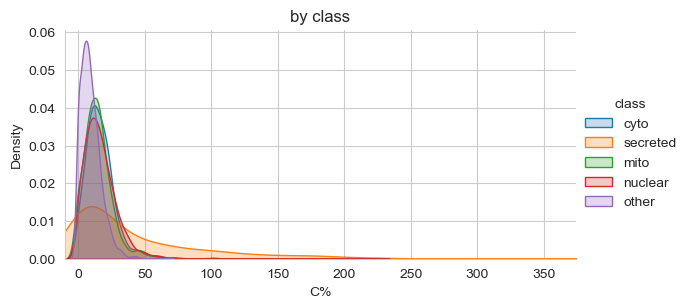

In [28]:
def visualise_distributions_kdeplot(df: pdf, var_of_interest: str, title=None, hue=None, col=None, bw_method=None, bw_adjust=1,
                                    xlim_min=None, xlim_max=None, sharex=True, sharey=True) -> None:
    fig = sns.FacetGrid(df, hue=hue, col=col, aspect=2, height=3, sharex=sharex, sharey=sharey)
    bw_method='scott'if not bw_method else bw_method # alternatively `silverman`, a scalar constant or callable.
    fig.map(sns.kdeplot, var_of_interest, shade=True, bw_adjust=bw_adjust, bw_method=bw_method)
    if not col: # otherwise these 3 lines will override sharex=False, unwanted behaviour when you explicitly set it to False.
        xlim_min = (df[var_of_interest].min() - 10) if not xlim_min else xlim_min
        xlim_max = (df[var_of_interest].max() + 10) if not xlim_max else xlim_max
        fig.set(xlim=(xlim_min, xlim_max))
    if title: fig.set(title=title)
    fig.add_legend()
    plt.show()

# using default bandwidth adjust factor of 1
visualise_distributions_kdeplot(df=laf, var_of_interest='C%', hue='class', title='by class')

/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of

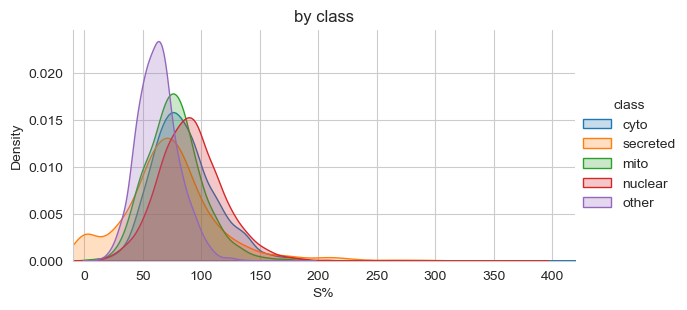

In [30]:
# using default bandwidth adjust factor of 1
visualise_distributions_kdeplot(df=laf, var_of_interest='S%', hue='class', title='by class')

/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of

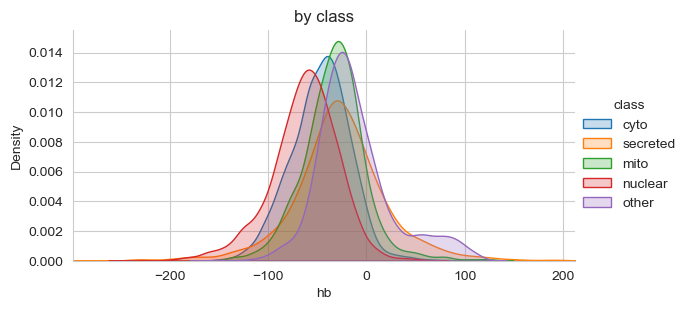

In [31]:
# using default bandwidth adjust factor of 1
visualise_distributions_kdeplot(df=laf, var_of_interest='hb', hue='class', title='by class')

/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of

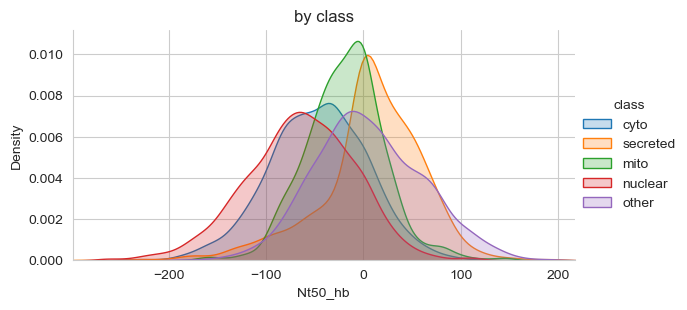

In [32]:
visualise_distributions_kdeplot(df=laf, var_of_interest='Nt50_hb', hue='class', title='by class')

/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/beanburger/miniconda3/envs/BI_CW/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of

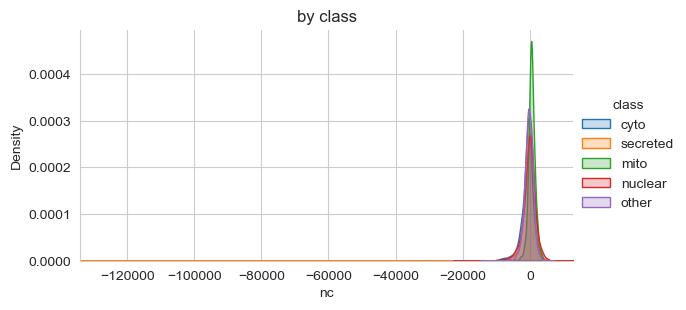

In [34]:
visualise_distributions_kdeplot(df=laf, var_of_interest='nc', hue='class', title='by class')

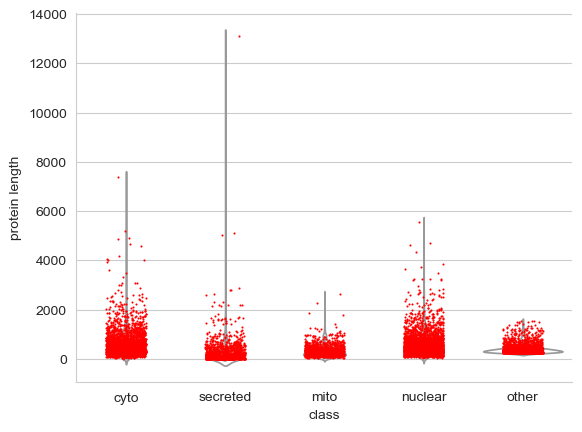

In [29]:
def visualise_by_pclass_violin_stripplots(df: pdf, colname: str) -> None:
    sns.violinplot(x='class', y=colname, data=df, color='white')
    sns.stripplot(x='class', y=colname, data=df, color="red", jitter=0.2, size=1.5)
    sns.despine()
    plt.show()

visualise_by_pclass_violin_stripplots(laf, 'protein length')